# Keras Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
# check for na values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 1200x800 with 0 Axes>

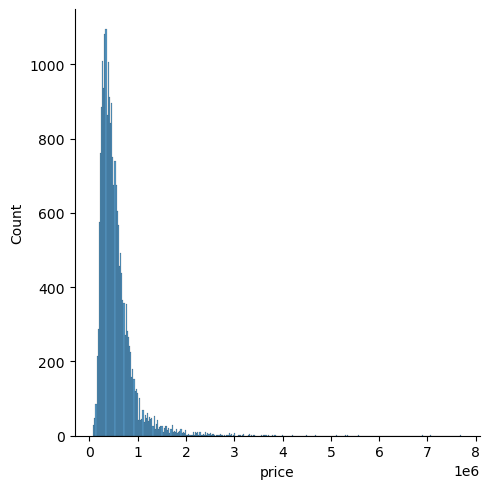

In [5]:
# how price distributes
plt.figure(figsize=(12,8))
sns.displot(df['price'])

C:\Users\thtrg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

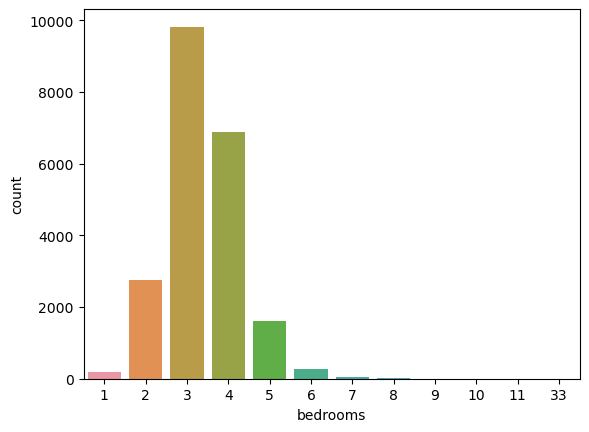

In [6]:
# count houses based on their number of bedroom
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

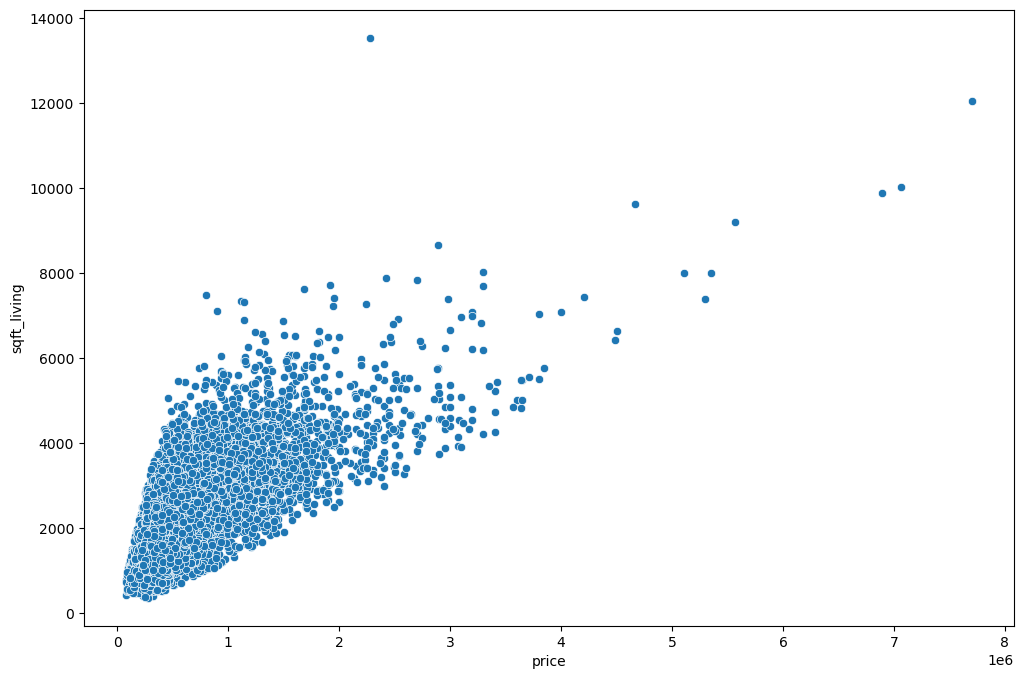

In [7]:
# affection between living area and house's price
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

### Geographical Properties

In [8]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [9]:
# calculate 1% of dataframe
len(df)*(0.01)

215.97

In [10]:
# 99% of dataframe
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

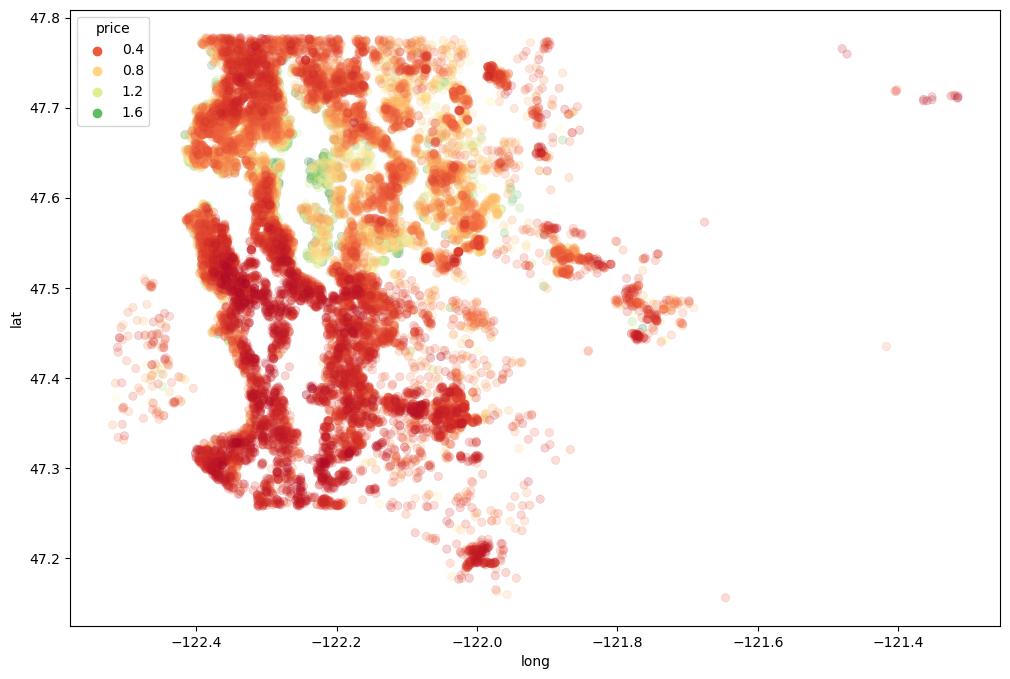

In [11]:
# show where the most house's price is (lattitude & longitude)
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

## Working with Feature Data

In [12]:
# 'id' column is unneccesary
df = df.drop('id',axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['month'] = df['date'].apply(lambda date:date.month)

In [15]:
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

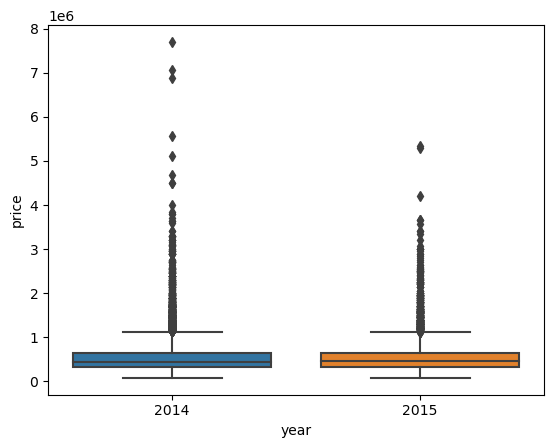

In [16]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

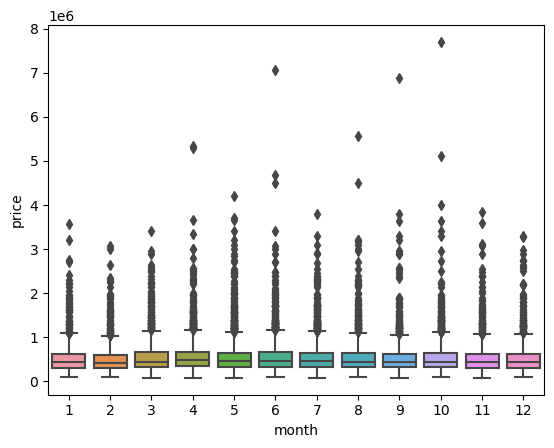

In [17]:
# price changes through months
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

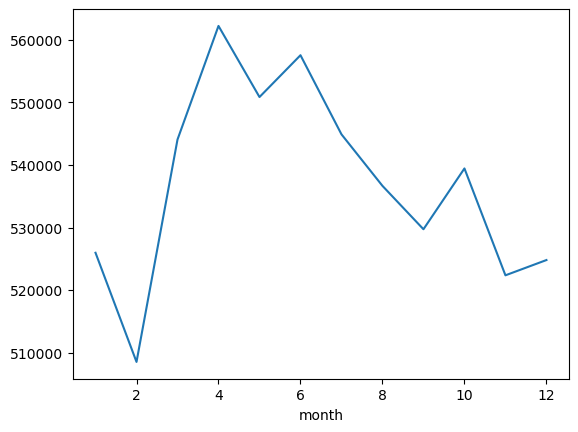

In [18]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

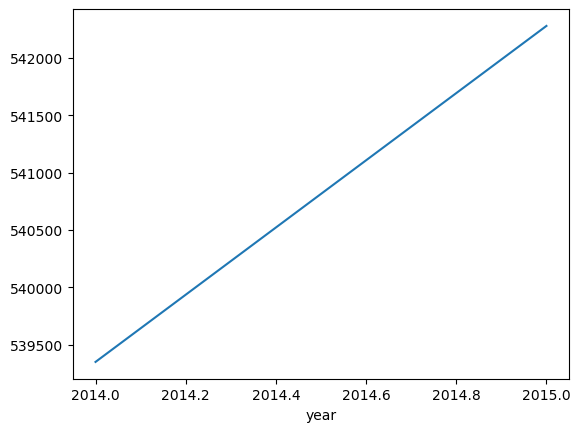

In [19]:
# price changes through years
df.groupby('year').mean()['price'].plot()

In [20]:
df = df.drop('date',axis=1)

In [21]:
# Zipcode contributes less
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
df = df.drop('zipcode',axis=1)

In [23]:
# make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [25]:
X = df.drop('price',axis=1)
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(15117, 19)

In [31]:
X_test.shape

(6480, 19)

## Creating a Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [34]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 432666738688.0000 - val_loss: 418862497792.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 438880010240.0000 - val_loss: 413288792064.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 415925141504.0000 - val_loss: 366216511488.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 341885812736.0000 - val_loss: 220274704384.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 191174148096.0000 - val_loss: 102893797376.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101891121152.0000 - val_loss: 94545698816.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96690323456.0000 - val_loss: 92956803072.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87629234176.0000 - val_loss: 91355422720.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91338547200.0000 - val_loss: 89647046656.0000
Epoch 10/400
119/119 ━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41856860160.0000 - val_loss: 38698696704.0000
Epoch 59/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40977227776.0000 - val_loss: 38452539392.0000
Epoch 60/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36612841472.0000 - val_loss: 38207549440.0000
Epoch 61/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37702651904.0000 - val_loss: 37897768960.0000
Epoch 62/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41273364480.0000 - val_loss: 37612363776.0000
Epoch 63/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36421500928.0000 - val_loss: 37366136832.0000
Epoch 64/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35958349824.0000 - val_loss: 37147553792.0000
Epoch 65/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37502087168.0000 - val_loss: 36869369856.0000
Epoch 66/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39002578944.0000 - val_loss: 36646158336.0000
Epoch 67/400
119/119 ━━━━━━━━━━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31693361152.0000 - val_loss: 32024567808.0000
Epoch 116/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35008192512.0000 - val_loss: 32004139008.0000
Epoch 117/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33937551360.0000 - val_loss: 31888384000.0000
Epoch 118/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34234826752.0000 - val_loss: 31871172608.0000
Epoch 119/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33328695296.0000 - val_loss: 31818737664.0000
Epoch 120/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32552783872.0000 - val_loss: 31762102272.0000
Epoch 121/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32617504768.0000 - val_loss: 31748616192.0000
Epoch 122/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34779656192.0000 - val_loss: 31672541184.0000
Epoch 123/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33204873216.0000 - val_loss: 31647434752.0000
Epoch 124/400
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33939013632.0000 - val_loss: 30214531072.0000
Epoch 173/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32038664192.0000 - val_loss: 30221215744.0000
Epoch 174/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31072944128.0000 - val_loss: 30173859840.0000
Epoch 175/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29438429184.0000 - val_loss: 30142572544.0000
Epoch 176/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29578917888.0000 - val_loss: 30193385472.0000
Epoch 177/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30983321600.0000 - val_loss: 30085079040.0000
Epoch 178/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33016420352.0000 - val_loss: 30062016512.0000
Epoch 179/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30640769024.0000 - val_loss: 30022789120.0000
Epoch 180/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33296742400.0000 - val_loss: 30024050688.0000
Epoch 181/400
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29841635328.0000 - val_loss: 29156988928.0000
Epoch 230/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29874255872.0000 - val_loss: 29154850816.0000
Epoch 231/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32283549696.0000 - val_loss: 29142112256.0000
Epoch 232/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32703729664.0000 - val_loss: 29133377536.0000
Epoch 233/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33460428800.0000 - val_loss: 29074180096.0000
Epoch 234/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31475902464.0000 - val_loss: 29097463808.0000
Epoch 235/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30022543360.0000 - val_loss: 29191825408.0000
Epoch 236/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30377582592.0000 - val_loss: 29099974656.0000
Epoch 237/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31291736064.0000 - val_loss: 29056440320.0000
Epoch 238/400
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31703044096.0000 - val_loss: 28336265216.0000
Epoch 287/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30943395840.0000 - val_loss: 28313485312.0000
Epoch 288/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29286160384.0000 - val_loss: 28400259072.0000
Epoch 289/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28977127424.0000 - val_loss: 28303669248.0000
Epoch 290/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30486855680.0000 - val_loss: 28329164800.0000
Epoch 291/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30803605504.0000 - val_loss: 28286201856.0000
Epoch 292/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29180790784.0000 - val_loss: 28274540544.0000
Epoch 293/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31233773568.0000 - val_loss: 28228440064.0000
Epoch 294/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29817593856.0000 - val_loss: 28274634752.0000
Epoch 295/400
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31704700928.0000 - val_loss: 27617579008.0000
Epoch 344/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31824836608.0000 - val_loss: 27576414208.0000
Epoch 345/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29088630784.0000 - val_loss: 27592628224.0000
Epoch 346/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29666820096.0000 - val_loss: 27544356864.0000
Epoch 347/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33196935168.0000 - val_loss: 27561771008.0000
Epoch 348/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32354140160.0000 - val_loss: 27517151232.0000
Epoch 349/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29493383168.0000 - val_loss: 27515842560.0000
Epoch 350/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29543100416.0000 - val_loss: 27504138240.0000
Epoch 351/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27516110848.0000 - val_loss: 27499872256.0000
Epoch 352/400
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27724730368.0000 - val_loss: 26751223808.0000


In [35]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

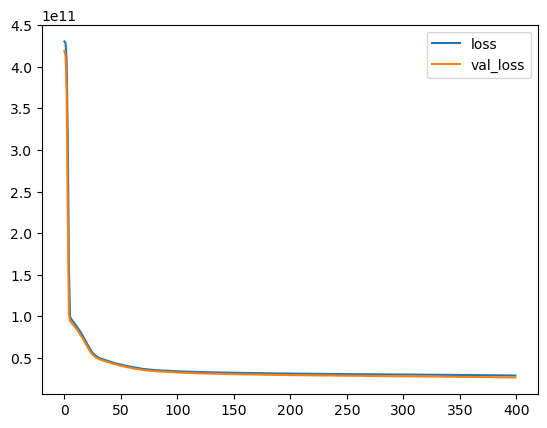

In [36]:
losses.plot()

# Evaluation on Test Data

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [38]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [39]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
mean_absolute_error(y_test,predictions)

101153.96066984953

In [41]:
np.sqrt(mean_squared_error(y_test,predictions))

163558.0151843239

In [42]:
explained_variance_score(y_test,predictions)

0.798306944214653

In [43]:
df['price'].mean()

540296.5735055795

In [44]:
df['price'].median()

450000.0

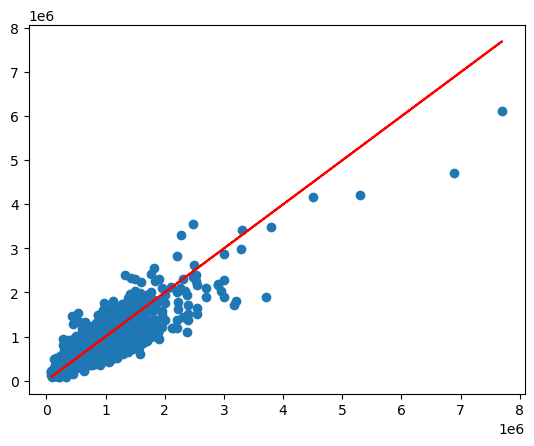

In [45]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [46]:
errors = y_test.values.reshape(6480, 1) - predictions

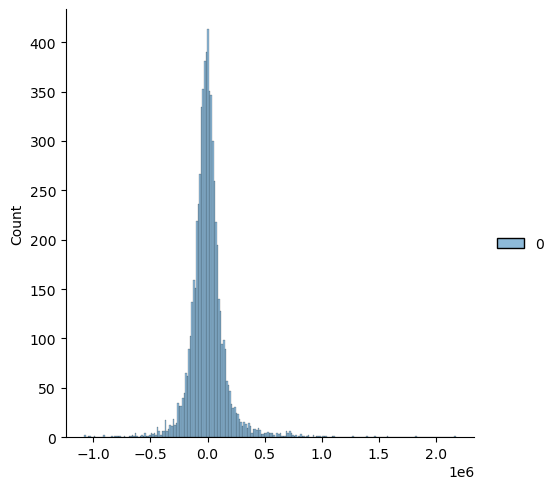

In [47]:
sns.displot(errors)

-------------
### Predicting on a brand new house

In [48]:
single_house = df.drop('price',axis=1).iloc[0]

In [49]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

C:\Users\thtrg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [50]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [51]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[282545.12]], dtype=float32)

In [52]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64